<center>
<font size='7' style="color:#0D47A1">  <b>CLEANING DATA</b> </font>
</center>

<hr style= "height:3px;">
<br>

Use SVC on the following data.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

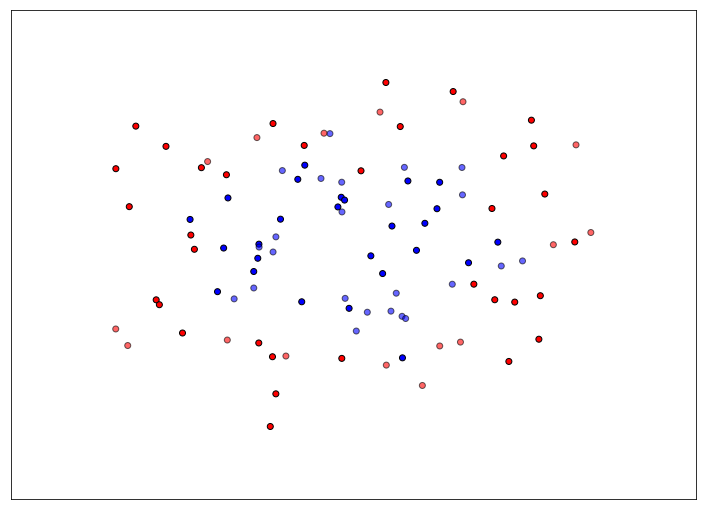

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
%matplotlib inline 
h = .02  # step size in the mesh
figure = plt.figure(figsize=(27, 9))
i = 1

# preprocess dataset, split into training and test part

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1


plt.show()

### Transform the data to the format of an SVM package
We are using sklearn.svm to analyze a synthetic dataset make cicles, so we dont have to worry about compatibility https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

### Are there outliers?
We can  use IsolationForest to find outliers.
### Is the data weighted? 
We have two classes and we need to make sure the proportion among them is close to 1 (or that the number of representatives of one divided by the total amount is closed to .5)


### Conduct simple scaling on the data
Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.
In "preprocessing" there is a function called StandardScaller that finds the coefficients to make our features centered and with standar deviation 1. We use it to convert our train data and our  test data with the same parameters.

### Consider the RBF kernel $K(x,y)=e^{\gamma||s-y||^2}$
When the number of features is very large, one may just use the linear kernel.
We split the train test to have a way to evaluate performance.


### Use cross-validation to find the best parameter $C$, $\gamma$
Here we tell to the Grid search to use "accuracy" as the score to compare. You will need to modify this to test for the 4 different scores available in the first task.

After we get the best parameters, we repeat the search with parameters closer to the previously found.

### Use the best parameter $C$ and $\gamma$ to train the whole training set
After the best (C, γ) is found, the whole training set is trained again
to generate the final classifier.
The above approach works well for problems with thousands or more data points.
For very large data sets a feasible approach is to randomly choose a subset of the
data set, conduct grid-search on them, and then do a better-region-only grid-search
on the complete data set.


This notebook follows https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

For Easy.py see http://www.developerstation.org/2011/03/simple-tutorial-on-using-libsvm.html